In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

ModuleNotFoundError: No module named 'folium'

In [429]:
zip_df = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')

In [430]:
vax_df = pd.read_csv('vaccine_with_protocol.csv')

In [431]:
population = pd.read_csv('population_by_zip.csv')

In [432]:
zip_df.head(10)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
5,3/11/2020,37210.0,1
6,3/11/2020,37212.0,2
7,3/11/2020,37214.0,1
8,3/11/2020,37215.0,3
9,3/12/2020,NaN,1


In [433]:
vax_df.head()

,vacc_date,Zip,count_given,dose_nbr,protocol
0,12/12/2020,37215.0,1.0,1.0,two-shot
1,12/14/2020,37205.0,1.0,2.0,two-shot
2,12/14/2020,37215.0,1.0,1.0,two-shot
3,12/15/2020,37221.0,1.0,1.0,two-shot
4,12/16/2020,37215.0,1.0,1.0,two-shot


In [434]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [435]:
vax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   Zip          6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [436]:
zip_df.count()

Specimen Collection Date    8832
Zip                         8456
Cases                       8832
dtype: int64

In [437]:
vax_df.count()

vacc_date      6694
Zip            6462
count_given    6686
dose_nbr       6686
protocol       6694
dtype: int64

In [438]:
pd.value_counts(zip_df['Cases'])

1      1453
2      1044
3       763
4       635
5       529
       ... 
91        1
83        1
146       1
114       1
179       1
Name: Cases, Length: 131, dtype: int64

In [439]:
pd.value_counts(zip_df['Zip'])

37013.0    382
37211.0    379
37209.0    364
37217.0    362
37115.0    361
37207.0    361
37076.0    357
37214.0    355
37203.0    344
37221.0    342
37206.0    340
37072.0    338
37208.0    338
37210.0    336
37205.0    330
37138.0    323
37218.0    321
37216.0    318
37215.0    317
37212.0    313
37204.0    306
37220.0    214
37189.0    211
37080.0    192
37228.0    168
37201.0    153
37219.0    140
37027.0    132
37213.0     43
37069.0     13
37238.0      3
Name: Zip, dtype: int64

In [440]:
vax_df.groupby('Zip')['count_given'].sum()


Zip
37013.0    27167.0
37027.0      506.0
37069.0       89.0
37072.0    13108.0
37076.0    16855.0
37080.0     3078.0
37115.0    12827.0
37138.0    10873.0
37189.0     1650.0
37201.0      756.0
37203.0    11678.0
37204.0     9723.0
37205.0    24451.0
37206.0    14310.0
37207.0    13888.0
37208.0     8262.0
37209.0    20553.0
37210.0     5493.0
37211.0    28477.0
37212.0    10877.0
37213.0      102.0
37214.0    13573.0
37215.0    19915.0
37216.0    10253.0
37217.0     8613.0
37218.0     6987.0
37219.0      891.0
37220.0     5190.0
37221.0    27622.0
37228.0     1040.0
37238.0        5.0
Name: count_given, dtype: float64

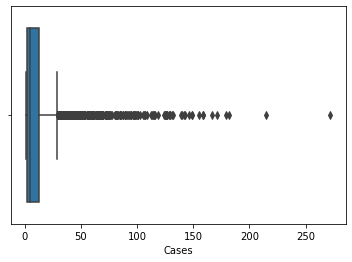

In [441]:
sns.boxplot(x=zip_df['Cases'])


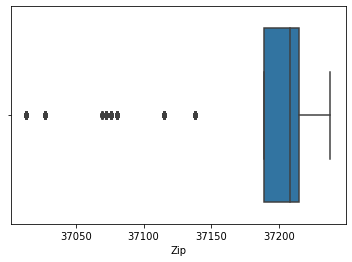

In [442]:
sns.boxplot(x=zip_df['Zip'])

In [443]:
zip_df.describe()

,Zip,Cases
count,8456.000000,8832.000000
mean,37177.833254,10.599977
std,61.642481,15.487583
min,37013.000000,1.000000
25%,37189.000000,2.000000
50%,37208.000000,5.000000
75%,37215.000000,13.000000
max,37238.000000,272.000000


In [444]:
zip_df.nlargest(10, ['Cases'])

,Specimen Collection Date,Zip,Cases
5592,11/23/2020,NaN,272
6760,1/4/2021,37013.0,215
5564,11/22/2020,NaN,182
6563,12/28/2020,37013.0,179
5968,12/7/2020,NaN,171
6789,1/5/2021,37013.0,167
1828,6/24/2020,37211.0,159
6593,12/29/2020,37013.0,159
5774,11/30/2020,NaN,155
5621,11/24/2020,NaN,149


In [445]:
most_vax_given = vax_df.groupby('Zip')['count_given'].sum()


In [446]:
most_vax_df = pd.DataFrame(most_vax_given).reset_index()
most_vax_df.columns = ['Zip', 'total_vaccines_given']
print(most_vax_df)


        Zip  total_vaccines_given
0   37013.0               27167.0
1   37027.0                 506.0
2   37069.0                  89.0
3   37072.0               13108.0
4   37076.0               16855.0
5   37080.0                3078.0
6   37115.0               12827.0
7   37138.0               10873.0
8   37189.0                1650.0
9   37201.0                 756.0
10  37203.0               11678.0
11  37204.0                9723.0
12  37205.0               24451.0
13  37206.0               14310.0
14  37207.0               13888.0
15  37208.0                8262.0
16  37209.0               20553.0
17  37210.0                5493.0
18  37211.0               28477.0
19  37212.0               10877.0
20  37213.0                 102.0
21  37214.0               13573.0
22  37215.0               19915.0
23  37216.0               10253.0
24  37217.0                8613.0
25  37218.0                6987.0
26  37219.0                 891.0
27  37220.0                5190.0
28  37221.0   

In [447]:
education = pd.read_csv('education_by_zip.csv')

In [448]:
education.nlargest(5, ['5th/6th grade'])

,Zip,Total:,High school graduate (includes equivalency),Bachelors degree,"Some college (>=1 yr, no degree)",Associates degree,Masters degree,Some college (<1 yr),No schooling completed,12th grade (no diploma),Professional school degree,5th/6th grade,7th/8th grade,10th grade,9th grade,11th grade,Nursery to 4th grade,Doctorate degree
18,37211,52117,11897,12916,6621,2937,4999,2007,1528,1122,811,1273,1504,1015,1334,775,738,640
0,37013,62355,15971,14323,9466,5652,4860,3147,1822,1386,1055,951,705,894,821,638,355,309
6,37115,27433,9319,3425,4258,1966,1417,1676,633,576,238,565,604,595,696,1001,344,120
14,37207,25832,8857,3745,4230,1443,1319,1545,580,730,178,385,459,586,496,954,88,237
17,37210,10895,3167,2199,1507,630,432,498,261,375,162,319,164,268,394,319,106,94


In [449]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Zip                                          30 non-null     int64
 1   Total:                                       30 non-null     int64
 2   High school graduate (includes equivalency)  30 non-null     int64
 3   Bachelors degree                             30 non-null     int64
 4   Some college (>=1 yr, no degree)             30 non-null     int64
 5   Associates degree                            30 non-null     int64
 6   Masters degree                               30 non-null     int64
 7   Some college (<1 yr)                         30 non-null     int64
 8   No schooling completed                       30 non-null     int64
 9   12th grade (no diploma)                      30 non-null     int64
 10  Professional school degree  

In [450]:
education.head()

,Zip,Total:,High school graduate (includes equivalency),Bachelors degree,"Some college (>=1 yr, no degree)",Associates degree,Masters degree,Some college (<1 yr),No schooling completed,12th grade (no diploma),Professional school degree,5th/6th grade,7th/8th grade,10th grade,9th grade,11th grade,Nursery to 4th grade,Doctorate degree
0,37013,62355,15971,14323,9466,5652,4860,3147,1822,1386,1055,951,705,894,821,638,355,309
1,37027,36625,2744,16139,2887,1693,7717,1215,112,129,2137,37,139,105,72,47,11,1441
2,37069,13385,1048,5901,1419,615,2514,504,23,89,750,10,39,9,0,24,0,440
3,37072,22679,6735,4367,3424,1801,1491,1947,256,427,360,161,353,306,259,426,68,298
4,37076,28788,6816,7658,4458,2649,2296,1855,272,433,473,110,60,403,377,399,141,388


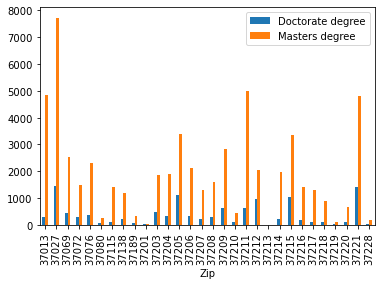

In [451]:
education.plot.bar('Zip', ['Doctorate degree','Masters degree'])

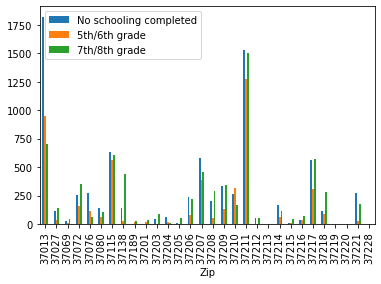

In [452]:
education.plot.bar('Zip',['No schooling completed','5th/6th grade','7th/8th grade'])

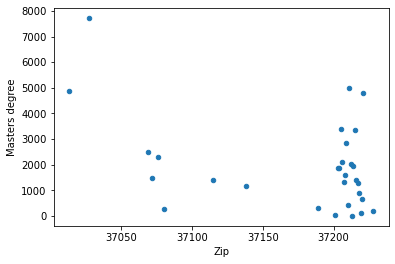

In [453]:
education.plot.scatter('Zip','Masters degree')

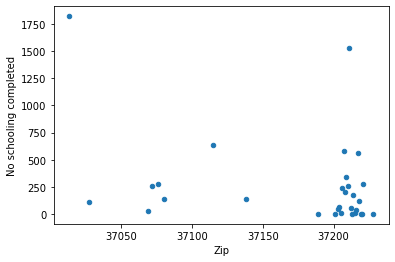

In [454]:
education.plot.scatter('Zip','No schooling completed')

In [455]:
education_perc = pd.read_csv('education_by_zip_perc.csv')

In [456]:
education_perc

,Zip,total,none,perc_none,n_4,perc_n_4,n_4_orless,perc_n_4_orless,5_6,perc_5_6,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
0,37013,62355,1822,2.92,355,0.57,2177,3.49,951,1.53,...,60991,97.81,1055,1.69,62046,99.50,309,0.50,62355,100
1,37027,36625,112,0.31,11,0.03,123,0.34,37,0.10,...,33047,90.23,2137,5.83,35184,96.07,1441,3.93,36625,100
2,37069,13385,23,0.17,0,0.00,23,0.17,10,0.07,...,12195,91.11,750,5.60,12945,96.71,440,3.29,13385,100
3,37072,22679,256,1.13,68,0.30,324,1.43,161,0.71,...,22021,97.10,360,1.59,22381,98.69,298,1.31,22679,100
4,37076,28788,272,0.94,141,0.49,413,1.43,110,0.38,...,27927,97.01,473,1.64,28400,98.65,388,1.35,28788,100
5,37080,5643,141,2.50,0,0.00,141,2.50,57,1.01,...,5497,97.41,86,1.52,5583,98.94,60,1.06,5643,100
6,37115,27433,633,2.31,344,1.25,977,3.56,565,2.06,...,27075,98.70,238,0.87,27313,99.56,120,0.44,27433,100
7,37138,17007,136,0.80,16,0.09,152,0.89,30,0.18,...,16389,96.37,407,2.39,16796,98.76,211,1.24,17007,100
8,37189,3139,0,0.00,0,0.00,0,0.00,14,0.45,...,2974,94.74,107,3.41,3081,98.15,58,1.85,3139,100
9,37201,1257,0,0.00,0,0.00,0,0.00,17,1.35,...,1221,97.14,18,1.43,1239,98.57,18,1.43,1257,100


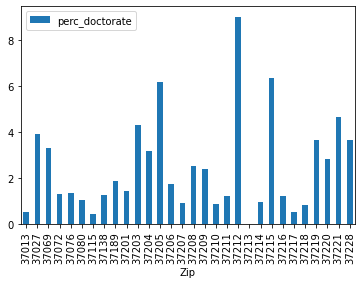

In [457]:
education_perc.plot.bar('Zip', 'perc_doctorate')

In [458]:
education_perc.describe()

,Zip,total,none,perc_none,n_4,perc_n_4,n_4_orless,perc_n_4_orless,5_6,perc_5_6,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,37174.533333,17864.933333,262.533333,1.006333,82.566667,0.294667,345.100000,1.300333,157.666667,0.646333,...,16885.666667,93.539333,589.933333,4.012000,17475.600000,97.551667,389.333333,2.448333,17864.933333,100.0
std,65.401536,14482.670774,425.011378,0.999815,154.148536,0.383385,564.360386,1.294155,295.077469,0.793036,...,14073.362893,5.645238,633.200787,3.887089,14318.966849,2.077990,409.275334,2.077990,14482.670774,0.0
min,37013.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,76.000000,78.650000,0.000000,0.000000,76.000000,90.980000,0.000000,0.000000,76.000000,100.0
25%,37150.750000,10067.000000,12.500000,0.080000,1.500000,0.007500,31.500000,0.280000,7.000000,0.075000,...,8813.500000,90.450000,147.000000,1.445000,9592.000000,96.440000,97.750000,0.985000,10067.000000,100.0
50%,37207.500000,15230.500000,126.000000,0.770000,21.000000,0.130000,132.000000,0.870000,34.500000,0.315000,...,13295.500000,95.775000,356.000000,2.495000,14619.500000,98.410000,267.500000,1.590000,15230.500000,100.0
75%,37214.750000,25135.500000,269.250000,1.605000,86.000000,0.355000,364.250000,1.747500,123.500000,0.955000,...,23895.000000,97.615000,795.750000,5.587500,24843.250000,99.015000,470.750000,3.560000,25135.500000,100.0
max,37228.000000,62355.000000,1822.000000,2.930000,738.000000,1.420000,2266.000000,4.350000,1273.000000,2.930000,...,60991.000000,100.000000,2472.000000,14.980000,62046.000000,100.000000,1441.000000,9.020000,62355.000000,100.0


In [459]:
most_vax_given


Zip
37013.0    27167.0
37027.0      506.0
37069.0       89.0
37072.0    13108.0
37076.0    16855.0
37080.0     3078.0
37115.0    12827.0
37138.0    10873.0
37189.0     1650.0
37201.0      756.0
37203.0    11678.0
37204.0     9723.0
37205.0    24451.0
37206.0    14310.0
37207.0    13888.0
37208.0     8262.0
37209.0    20553.0
37210.0     5493.0
37211.0    28477.0
37212.0    10877.0
37213.0      102.0
37214.0    13573.0
37215.0    19915.0
37216.0    10253.0
37217.0     8613.0
37218.0     6987.0
37219.0      891.0
37220.0     5190.0
37221.0    27622.0
37228.0     1040.0
37238.0        5.0
Name: count_given, dtype: float64

In [460]:
vax_clean = vax_df[vax_df['dose_nbr'] == 1]


In [461]:
vax_clean

,vacc_date,Zip,count_given,dose_nbr,protocol
0,12/12/2020,37215.0,1.0,1.0,two-shot
2,12/14/2020,37215.0,1.0,1.0,two-shot
3,12/15/2020,37221.0,1.0,1.0,two-shot
4,12/16/2020,37215.0,1.0,1.0,two-shot
5,12/17/2020,37013.0,16.0,1.0,two-shot
...,...,...,...,...,...
6686,4/7/2021,37221.0,81.0,1.0,two-shot
6687,4/7/2021,37221.0,2.0,1.0,one-shot
6689,4/7/2021,37228.0,9.0,1.0,two-shot
6691,4/7/2021,NaN,8.0,1.0,two-shot


In [462]:
cases_by_zip = zip_df.groupby('Zip')['Cases'].sum()
df_cases_by_zip = cases_by_zip.to_frame()
df_cases_by_zip

,Cases
Zip,
37013.0,13354
37027.0,231
37069.0,16
37072.0,2984
37076.0,4279
37080.0,574
37115.0,4574
37138.0,2359
37189.0,479


In [463]:
vax_by_zip = vax_clean.groupby('Zip')['count_given'].sum()
df_vax_by_zip = vax_by_zip.to_frame()
df_vax_by_zip

,count_given
Zip,
37013.0,18465.0
37027.0,352.0
37069.0,50.0
37072.0,8460.0
37076.0,11113.0
37080.0,1970.0
37115.0,8520.0
37138.0,7152.0
37189.0,1056.0


In [464]:
top5cases = cases_by_zip.nlargest(5)
top5vax = vax_by_zip.nlargest(5)
bottom5cases = cases_by_zip.nsmallest(5)
bottom5vax = vax_by_zip.nsmallest(5)

In [465]:
top5vax

Zip
37211.0    19175.0
37013.0    18465.0
37221.0    17222.0
37205.0    14666.0
37209.0    13600.0
Name: count_given, dtype: float64

In [466]:
bottom5vax

Zip
37238.0      3.0
37069.0     50.0
37213.0     72.0
37027.0    352.0
37201.0    576.0
Name: count_given, dtype: float64

In [467]:
df_cases_by_zip = df_cases_by_zip.merge(population, on=['Zip'], how='left')

In [468]:
df_cases_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zip         31 non-null     float64
 1   Cases       31 non-null     int64  
 2   Location    21 non-null     object 
 3   Population  30 non-null     float64
 4   Den         20 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ KB


In [469]:
df_cases_by_zip['cases_by_perc'] = 100* df_cases_by_zip['Cases'] / df_cases_by_zip['Population']

In [470]:
df_cases_by_zip['cases_by_perc'] = 100* df_cases_by_zip.apply(lambda row: float(row['Cases']) / float(row['Population']), axis=1)

In [471]:
df_cases_by_zip

,Zip,Cases,Location,Population,Den,cases_by_perc
0,37013.0,13354,NaN,51343.0,NaN,26.009388
1,37027.0,231,NaN,35747.0,NaN,0.646208
2,37069.0,16,NaN,16243.0,NaN,0.098504
3,37072.0,2984,NaN,26386.0,NaN,11.309028
4,37076.0,4279,NaN,29547.0,NaN,14.482012
5,37080.0,574,NaN,7394.0,NaN,7.763051
6,37115.0,4574,NaN,35192.0,NaN,12.997272
7,37138.0,2359,NaN,22160.0,NaN,10.645307
8,37189.0,479,NaN,2343.0,NaN,20.443875
9,37201.0,299,"36.165550, -86.777679",1167.0,3602.97,25.621251


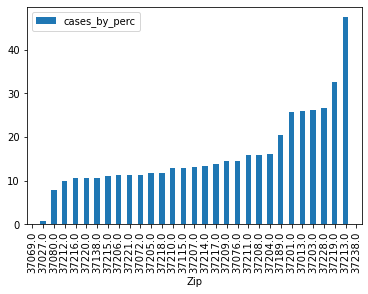

In [472]:
df_cases_by_zip = df_cases_by_zip.sort_values('cases_by_perc')
df_cases_by_zip.plot.bar(x='Zip', y='cases_by_perc')

In [473]:
df_vax_by_zip = df_vax_by_zip.merge(population, left_on='Zip', right_on='Zip', how='left')

In [474]:
df_vax_by_zip

,Zip,count_given,Location,Population,Den
0,37013.0,18465.0,NaN,51343.0,NaN
1,37027.0,352.0,NaN,35747.0,NaN
2,37069.0,50.0,NaN,16243.0,NaN
3,37072.0,8460.0,NaN,26386.0,NaN
4,37076.0,11113.0,NaN,29547.0,NaN
5,37080.0,1970.0,NaN,7394.0,NaN
6,37115.0,8520.0,NaN,35192.0,NaN
7,37138.0,7152.0,NaN,22160.0,NaN
8,37189.0,1056.0,NaN,2343.0,NaN
9,37201.0,576.0,"36.165550, -86.777679",1167.0,3602.97


In [475]:
df_vax_by_zip['vac_by_perc'] = df_vax_by_zip.apply(lambda row: 100* float(row['count_given']) / float(row['Population']), axis=1)

In [476]:
df_all = df_cases_by_zip.merge(df_vax_by_zip, on=['Zip', 'Location', 'Population', 'Den'], how='inner')

In [477]:
df_all = df_all.merge(education_perc, on='Zip', how='left')

In [478]:
df_all = df_all.rename(columns={'count_given': 'vac_given', 'total': 'total_ed', 'Den': 'pop_den', 'Zip': 'zip', 'Cases': 'cases', 'none': 'no_ed', 'Population': 'pop', 'Location': 'location'})

In [479]:
df_all

,zip,cases,location,pop,pop_den,cases_by_perc,vac_given,vac_by_perc,total_ed,no_ed,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
0,37069.0,16,NaN,16243.0,NaN,0.098504,50.0,0.307825,13385.0,23.0,...,12195.0,91.11,750.0,5.60,12945.0,96.71,440.0,3.29,13385.0,100.0
1,37027.0,231,NaN,35747.0,NaN,0.646208,352.0,0.984698,36625.0,112.0,...,33047.0,90.23,2137.0,5.83,35184.0,96.07,1441.0,3.93,36625.0,100.0
2,37080.0,574,NaN,7394.0,NaN,7.763051,1970.0,26.643224,5643.0,141.0,...,5497.0,97.41,86.0,1.52,5583.0,98.94,60.0,1.06,5643.0,100.0
3,37212.0,1823,"36.133973, -86.801471",18547.0,6556.46,9.829083,7160.0,38.604626,10553.0,50.0,...,8776.0,83.16,825.0,7.82,9601.0,90.98,952.0,9.02,10553.0,100.0
4,37216.0,2011,"36.216583, -86.726843",19132.0,2791.23,10.511185,7230.0,37.790090,13961.0,33.0,...,13613.0,97.51,176.0,1.26,13789.0,98.77,172.0,1.23,13961.0,100.0
5,37220.0,656,"36.068452, -86.793116",6163.0,797.85,10.644167,3239.0,52.555574,4278.0,0.0,...,3805.0,88.94,352.0,8.23,4157.0,97.17,121.0,2.83,4278.0,100.0
6,37138.0,2359,NaN,22160.0,NaN,10.645307,7152.0,32.274368,17007.0,136.0,...,16389.0,96.37,407.0,2.39,16796.0,98.76,211.0,1.24,17007.0,100.0
7,37215.0,2438,"36.080535, -86.833278",22112.0,1382.95,11.025687,12132.0,54.866136,16500.0,7.0,...,12978.0,78.65,2472.0,14.98,15450.0,93.64,1050.0,6.36,16500.0,100.0
8,37206.0,3112,"36.180771, -86.730153",27751.0,3597.99,11.214010,10124.0,36.481568,18741.0,241.0,...,17837.0,95.18,576.0,3.07,18413.0,98.25,328.0,1.75,18741.0,100.0
9,37221.0,3910,"36.063625, -86.977097",34809.0,753.76,11.232727,17222.0,49.475710,30029.0,276.0,...,27518.0,91.64,1111.0,3.70,28629.0,95.34,1400.0,4.66,30029.0,100.0


In [480]:
df_all = df_all.sort_values('vac_by_perc')
df_all_2 = df_all.drop(labels = [0, 1])
df_all_2 = df_all_2.sort_values('vac_by_perc')
df_all_2.zip = df_all_2.zip.astype(int)
df_all_2

,zip,cases,location,pop,pop_den,cases_by_perc,vac_given,vac_by_perc,total_ed,no_ed,...,master_orless,perc_master_orless,professional,perc_professional,professional_orless,perc_professional_orless,doctorate,perc_doctorate,doctorate_orless,perc_doctorate_orless
17,37217,3907,"36.113155, -86.667020",28293.0,1488.46,13.809069,5837.0,20.630545,20580.0,560.0,...,20335.0,98.81,142.0,0.69,20477.0,99.50,103.0,0.50,20580.0,100.0
13,37210,2100,"36.149265, -86.732957",16170.0,1747.70,12.987013,3747.0,23.172542,10895.0,261.0,...,10639.0,97.65,162.0,1.49,10801.0,99.14,94.0,0.86,10895.0,100.0
14,37115,4574,NaN,35192.0,NaN,12.997272,8520.0,24.210048,27433.0,633.0,...,27075.0,98.70,238.0,0.87,27313.0,99.56,120.0,0.44,27433.0,100.0
15,37207,4729,"36.238944, -86.779883",35744.0,1712.06,13.230192,9255.0,25.892457,25832.0,580.0,...,25417.0,98.39,178.0,0.69,25595.0,99.08,237.0,0.92,25832.0,100.0
2,37080,574,NaN,7394.0,NaN,7.763051,1970.0,26.643224,5643.0,141.0,...,5497.0,97.41,86.0,1.52,5583.0,98.94,60.0,1.06,5643.0,100.0
12,37218,1785,"36.209917, -86.889939",15079.0,367.31,11.837655,4391.0,29.119968,11538.0,116.0,...,11304.0,97.97,138.0,1.20,11442.0,99.17,96.0,0.83,11538.0,100.0
20,37211,10233,"36.066734, -86.722609",64753.0,3030.86,15.803129,19175.0,29.612528,52117.0,1528.0,...,50666.0,97.22,811.0,1.56,51477.0,98.77,640.0,1.23,52117.0,100.0
10,37072,2984,NaN,26386.0,NaN,11.309028,8460.0,32.062457,22679.0,256.0,...,22021.0,97.10,360.0,1.59,22381.0,98.69,298.0,1.31,22679.0,100.0
6,37138,2359,NaN,22160.0,NaN,10.645307,7152.0,32.274368,17007.0,136.0,...,16389.0,96.37,407.0,2.39,16796.0,98.76,211.0,1.24,17007.0,100.0
16,37214,3508,"36.197795, -86.673345",26474.0,1260.43,13.250737,9198.0,34.743522,23046.0,170.0,...,22548.0,97.84,277.0,1.20,22825.0,99.04,221.0,0.96,23046.0,100.0


In [495]:
df_all_2[['cases_by_perc', 'vac_by_perc', 'perc_hs_grad_ormore', 'perc_associate_ormore']].corr()

,cases_by_perc,vac_by_perc,perc_hs_grad_ormore,perc_associate_ormore
cases_by_perc,1.000000,0.482122,0.236664,-0.065362
vac_by_perc,0.482122,1.000000,0.695805,0.752785
perc_hs_grad_ormore,0.236664,0.695805,1.000000,0.752484
perc_associate_ormore,-0.065362,0.752785,0.752484,1.000000
